In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
from scipy.optimize import minimize

# Introduction to Linear Regression and Linear Programming

**OBJECTIVES**

- Derive ordinary least squares models for data
- Evaluate regression models using mean squared error
- Examine errors and assumptions in least squares models
- Use `scikit-learn` to fit regression models to data
- Set up linear programming problems with constraints using `scipy.optimize`

## Calculus Refresher

An important idea is that of finding a maximum or minimum of a function.  From calculus, we have the tools required.  Specifically, a maximum or minimum value of a function $f$ occurs wherever $f'(x) = 0$ or is underfined.  Consider the function:

$$f(x) = x^2$$

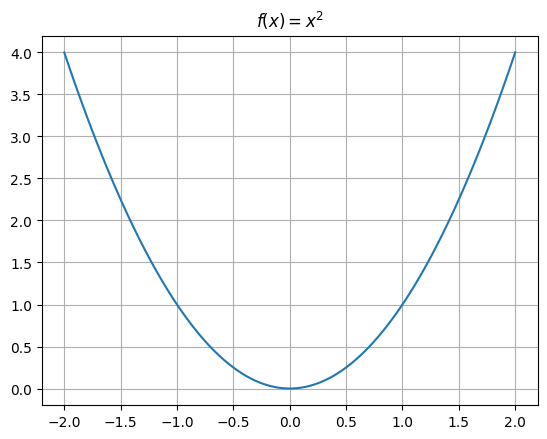

In [2]:
def f(x): return x**2
x = np.linspace(-2, 2, 100)
plt.plot(x, f(x))
plt.grid()
plt.title(r'$f(x) = x^2$');

Here, using our power rule for derivatives of polynomials we have:

$$f'(x) = 2x$$

and are left to solve:

$$0 = 2x$$

or 

$$x = 0$$

**PROBLEM**: Use `minimize` to determine where the function $f(x) = (5 - 2x)^2$ has a minimum.

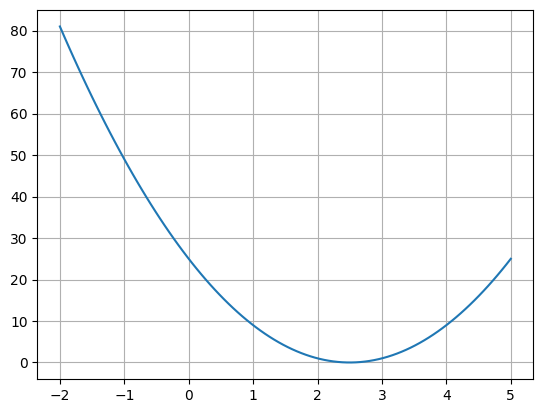

In [3]:
def f(x): return (5 - 2*x)**2
x = np.linspace(-2, 5, 100)
plt.plot(x, f(x))
plt.grid();

In [4]:
minimize?

Signature:
minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where ``x`` is a 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where ``n`` is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(see here) <

In [5]:
x0 = 0
results = minimize(fun = f, x0 = x0)
print(results.x)

[2.49999999]


#### Using the chain rule

**Example 1**: Line of best fit

In [6]:
import seaborn as sns

In [7]:
tips = sns.load_dataset('tips')

In [8]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

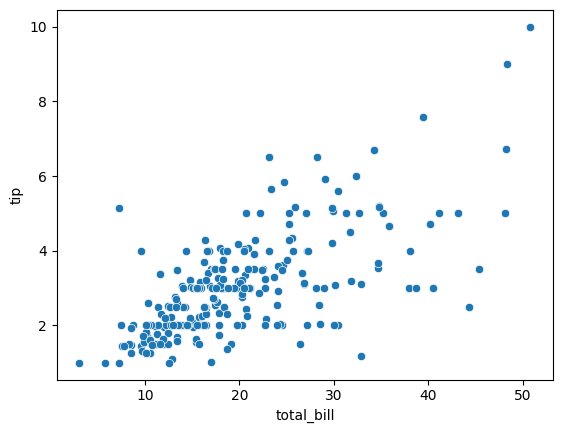

In [9]:
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip');

In [10]:
def y1(x): return .19*x

In [11]:
def y2(x): return .12*x

In [12]:
x = tips['total_bill']

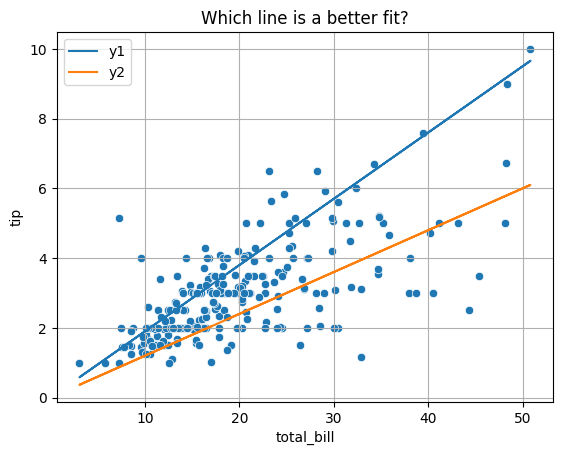

In [13]:
plt.plot(x, y1(x), label = 'y1')
plt.plot(x, y2(x), label = 'y2')
plt.legend()
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip')
plt.title('Which line is a better fit?')
plt.grid();

To decide between all possible lines we will examine the error in all these models and select the one that minimizes this error.

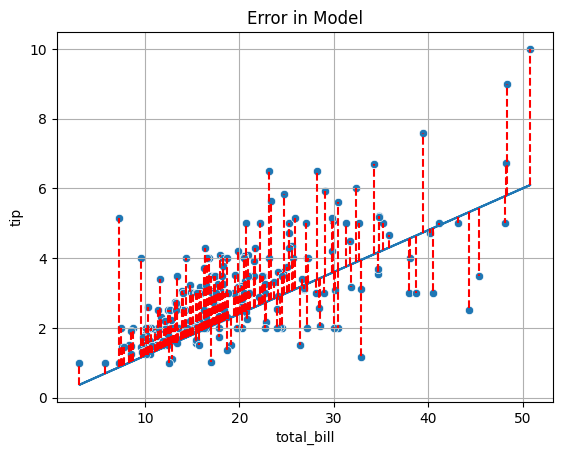

In [14]:
plt.plot(x, y2(x))
for i, yhat in enumerate(y2(x)):
    plt.vlines(x = tips['total_bill'].iloc[i], ymin = yhat, ymax = tips['tip'].iloc[i], color = 'red', linestyle = '--')
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip')
plt.title('Error in Model')
plt.grid();

#### Mean Squared Error

$$\text{MSE}(\beta_0) = \frac{1}{n}\sum_{i = 1}^n (y_i - \beta_0x)^2$$



**OBJECTIVE**: Minimize mean squared error

In [15]:
def mse(beta):
    return np.mean((y - beta*x)**2)

In [16]:
x = tips['total_bill']
y = tips['tip']

In [17]:
mse(.19)

2.185143996844262

In [18]:
mse(.12)

1.4430533029508197

**PROBLEM**

Use the array of slopes below to loop over each possible slope and determine which gives the lowest Mean Squared Error.

In [19]:
slopes = np.linspace(.1, .2, 11)
slopes

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ])

In [20]:
for slope in slopes:
    print(slope, mse(slope))

0.1 2.0777683729508194
0.11 1.7133696722540983
0.12000000000000001 1.4430533029508195
0.13 1.2668192650409837
0.14 1.18466755852459
0.15000000000000002 1.1965981834016395
0.16 1.3026111396721312
0.17 1.502706427336066
0.18 1.7968840463934426
0.19 2.185143996844262
0.2 2.667486278688525


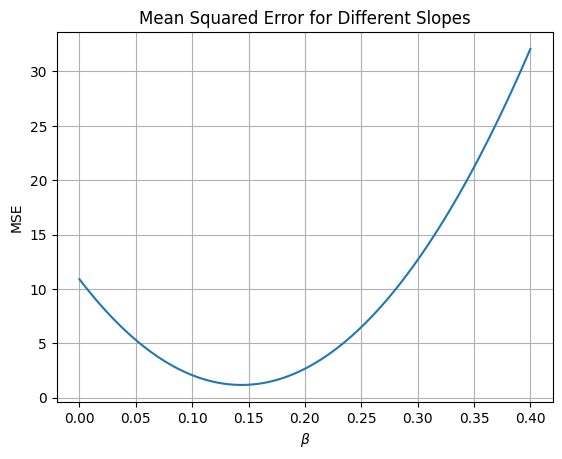

In [21]:
betas = np.linspace(0, .4, 100)
plt.plot(betas, [mse(beta) for beta in betas])
plt.xlabel(r'$\beta$')
plt.ylabel('MSE')
plt.title('Mean Squared Error for Different Slopes')
plt.grid();

#### Using `scipy` 

To find the minimum of our objective function, the `minimize` function can again be used.  It requires a function to be minimized and an intial guess.

In [22]:
minimize(mse, x0 = .1)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.1781161154513358
        x: [ 1.437e-01]
      nit: 1
      jac: [ 1.103e-06]
 hess_inv: [[1]]
     nfev: 6
     njev: 3

### Solving the Problem Exactly

From calculus we know that the minimum value for a quadratic will occur where the first derivative equals zero.  Thus, to determine the equations for the line of best fit, we minimize the MSE function with respect to $\beta$.

$$f(\beta) = \frac{1}{n}\sum_{i = 1}^n (y - \beta x)^2$$

$$f'(\beta) = \frac{-2}{n}\sum_{i = 1}^n(y - \beta x) x$$

$$ 0 = \frac{-2}{n}\sum_{i = 1}^n(y - \beta x) x$$

$$0 = \sum_{i = 1}^n(y - \beta x) x$$

$$0 = \sum yx - \sum \beta x^2 $$

$$\sum \beta x^2 = \sum y x$$

$$\beta \sum x^2 = \sum y x$$

$$\beta = \frac{\sum y x}{\sum x^2}$$

In [23]:
np.sum(tips['total_bill']*tips['tip'])/np.sum(tips['total_bill']**2)

0.14373189527721666

### Adding an intercept

Consider the model:

$$y = \beta_0 + \beta_1 x + \epsilon$$

where $\epsilon = N(0, 1)$.

Now, the objective function changes to be a function in 3-Dimensions where the slope and intercept terms are input and mean squared error is the output.

$$\text{MSE}(\beta_0, \beta_1) = \frac{1}{n}\sum_{i = 1}^n (y - (\beta_0 + \beta_1 x)^2)$$

In [24]:
def mse(betas):
    return np.mean((y - (betas[0] + betas[1]*x))**2)

In [25]:
mse([4, 3])

4305.7986356557385

In [26]:
slopes = np.linspace(4, 5, 10)
intercepts = np.linspace(2, 3, 10)
for slope in slopes:
    for intercept in intercepts:
        print(f'Slope {slope: .2f}, Intercept: {intercept: .2f}, MSE: {mse([slope, intercept])}')

Slope  4.00, Intercept:  2.00, MSE: 1930.6791278688527
Slope  4.00, Intercept:  2.11, MSE: 2148.120884836066
Slope  4.00, Intercept:  2.22, MSE: 2377.1777444444447
Slope  4.00, Intercept:  2.33, MSE: 2617.8497066939894
Slope  4.00, Intercept:  2.44, MSE: 2870.1367715846995
Slope  4.00, Intercept:  2.56, MSE: 3134.038939116575
Slope  4.00, Intercept:  2.67, MSE: 3409.556209289617
Slope  4.00, Intercept:  2.78, MSE: 3696.6885821038245
Slope  4.00, Intercept:  2.89, MSE: 3995.436057559198
Slope  4.00, Intercept:  3.00, MSE: 4305.7986356557385
Slope  4.11, Intercept:  2.00, MSE: 1939.7078305606155
Slope  4.11, Intercept:  2.11, MSE: 2157.6381293209874
Slope  4.11, Intercept:  2.22, MSE: 2387.183530722526
Slope  4.11, Intercept:  2.33, MSE: 2628.3440347652295
Slope  4.11, Intercept:  2.44, MSE: 2881.1196414491
Slope  4.11, Intercept:  2.56, MSE: 3145.510350774134
Slope  4.11, Intercept:  2.67, MSE: 3421.516162740336
Slope  4.11, Intercept:  2.78, MSE: 3709.137077347703
Slope  4.11, Intercep

In [27]:
minimize(mse, [5, 3])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.0360194420115216
        x: [ 9.203e-01  1.050e-01]
      nit: 5
      jac: [-5.960e-08 -8.643e-07]
 hess_inv: [[ 2.980e+00 -1.253e-01]
            [-1.253e-01  6.334e-03]]
     nfev: 18
     njev: 6

In [28]:
betas = minimize(mse, [0, 0]).x

In [29]:
def lobf(x): return betas[0] + betas[1]*x

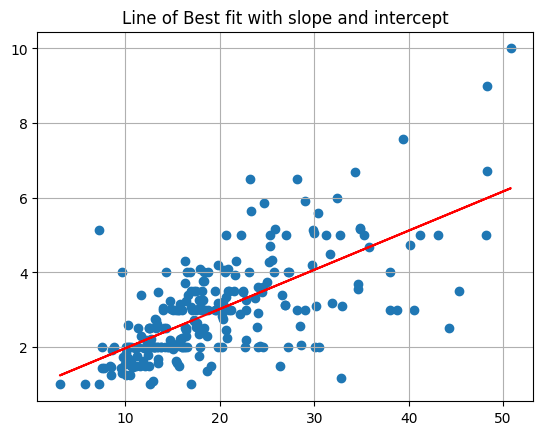

In [30]:
plt.scatter(x, y)
plt.plot(x, lobf(x), color = 'red')
plt.grid()
plt.title('Line of Best fit with slope and intercept');

### Using `scikit-learn`

The `scikit-learn` library has many predictive models and modeling tools.  It is a popular library in industry for Machine Learning tasks. [docs](https://scikit-learn.org/stable/index.html)

In [ ]:
# !pip install -U scikit-learn

In [33]:
credit = pd.read_csv('../data/Credit.csv', index_col=0)
credit.head()

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
1   14.891   3606     283      2   34         11    Male      No     Yes   
2  106.025   6645     483      3   82         15  Female     Yes     Yes   
3  104.593   7075     514      4   71         11    Male      No      No   
4  148.924   9504     681      3   36         11  Female      No      No   
5   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  
1  Caucasian      333  
2      Asian      903  
3      Asian      580  
4      Asian      964  
5  Caucasian      331

In [34]:
from sklearn.linear_model import LinearRegression

**PROBLEM**: Which feature is the strongest predictor of `Balance` in the data?

<Axes: >

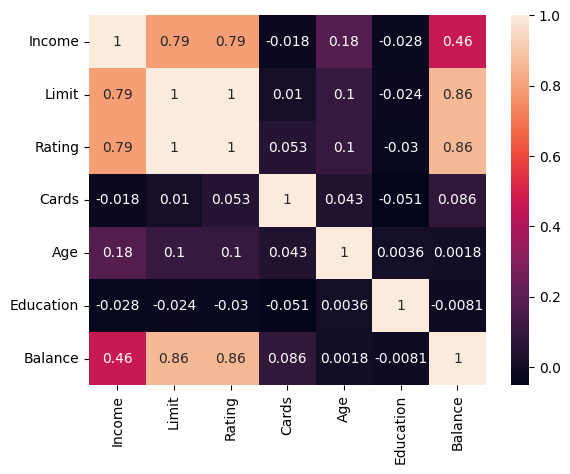

In [35]:
sns.heatmap(credit.corr(numeric_only = True), annot = True)

In [40]:
#define X as the feature most correlated with Balance
#and y as Balance
X = credit[['Rating']]
y = credit['Balance']

**PROBLEM**: Build a `LinearRegression` model, determine the **Root Mean Squared Error** and interpret the slope and intercept.

1. Instantiate
2. Fit
3. Predict/score

In [41]:
X.shape, y.shape

((400, 1), (400,))

In [42]:
#instantiate
model = LinearRegression()

In [43]:
#fit
model.fit(X, y)

LinearRegression()

In [44]:
#look at coefficient and intercept
model.coef_, model.intercept_

(array([2.56624033]), -390.84634178723786)

In [45]:
yhat = model.predict(X)
yhat[:10]

array([ 335.39967085,  848.64773632,  928.20118647, 1356.76332113,
        525.30145507, 1069.34440447,  273.80990299,  923.06870581,
        291.77358529,  869.17765894])

(array([  3.,  11.,  31.,  91., 116.,  86.,  41.,   9.,   6.,   6.]),
 array([-712.2825064 , -558.1506416 , -404.01877679, -249.88691199,
         -95.75504718,   58.37681762,  212.50868243,  366.64054724,
         520.77241204,  674.90427685,  829.03614165]),
 <BarContainer object of 10 artists>)

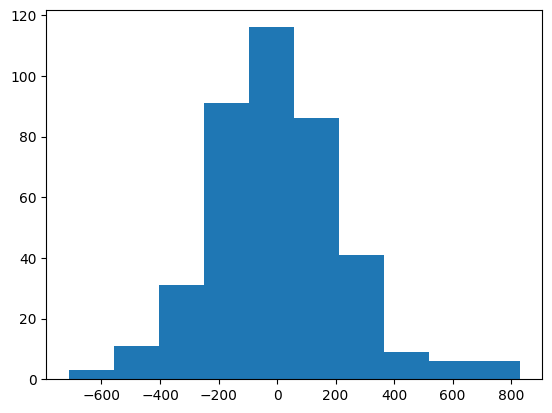

In [46]:
#examine the distribution of errors -- want normal centered at 0
plt.hist((y - yhat))

In [47]:
model.score(X, y) #r^2 score

0.7458484180585037

In [48]:
from sklearn.metrics import mean_squared_error

In [ ]:
#make predictions


In [49]:
#error between true and predicted
mean_squared_error(y, yhat)

53587.80508183237

In [50]:
np.sqrt(mean_squared_error(y, yhat)) #Root Mean Squared Error

231.4903995457098

In [55]:
credit.head(2)

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
1   14.891   3606     283      2   34         11    Male      No     Yes   
2  106.025   6645     483      3   82         15  Female     Yes     Yes   

   Ethnicity  Balance  
1  Caucasian      333  
2      Asian      903

In [56]:
X2 = credit[['Rating', 'Limit', 'Income', 'Age']]

In [57]:
model2 = LinearRegression()
model2.fit(X2, y)

LinearRegression()

In [58]:
yhat2 = model2.predict(X2)

In [59]:
np.sqrt(mean_squared_error(y, yhat2))

160.88858783942516

In [60]:
model2.coef_

array([ 2.73142151,  0.08183201, -7.61267561, -0.85611769])

### Problem: Determine $\alpha$ and $\beta$ of an investment

Consider an investment with return of the market as $R_M$ (say the S&P) and the return of a stock $R$ over the same time period.

$$R = \alpha + \beta*R_M + \epsilon$$

In [ ]:
import yfinance as yf

In [ ]:
data = yf.download(["NVDA", "SPY"], period="5y")
data.head()

In [ ]:
data.info()

In [ ]:
close = data.iloc[:, [0, 1]]

In [ ]:
close.pct_change().plot()

In [ ]:
returns = close.pct_change()

In [ ]:
sns.regplot(x = returns.iloc[:, 1], y = returns.iloc[:, 0], scatter_kws={'alpha': 0.3})
plt.xlabel('SPY Close Pct Change')
plt.ylabel('NVDA Close Pct Change')
plt.grid();

In [ ]:
#instantiate


In [ ]:
#fit


In [ ]:
#examine our alpha and beta


#### Problem

Load in the california housing data from the `sample_data` folder in colab.  Use this data to build a regression model with:

1. The most correlated feature to housing prices as input and price as target
2. The five features you believe would be most important
3. Which model has a lower MSE?

### Linear Programming: An example

A dog daycare feeds the dogs a diet that requires a minimum of 15 grams of fiber, 30 grams of protein.  Each pound of chick peas contains 1 gram of protein, 5 grams of fiber, and 25 grams of fat. Cottage cheese contains 2 grams of protein, 1 gram of fiber, and 14 grams of fat. Suppose that chick peas are priced at 8 USD per pound, and cottage cheese at 6 USD per pound.  The nutritionist claims the dogs will not eat more than 285 grams of fat.   Your goal is to obtain the most economical solution given these constraints.

This is summarized in the table below:

| ingredient | protein | fiber | fat | cost |
| ------ | ------ | ------- | ------- | ------- |
| chick peas | 1 g | 5 g | 25 g | \$8 |
| cottage cheese | 2 g | 1 g | 14 g | \$6 |
| minimum | 15 g | 30 g |  |   |
| maximum |    |     |  285 g |   |

Mathematically, the objective function is:

$$C = 6x + 8y$$

where $x$ = chick peas and $y$ = cottage cheese.  This is the total cost of the combination of chick peas and cottage cheese.

We will save the coefficients as a list for use later.

In [ ]:
c = [6, 8]

Because each pound of chick peas contains 1 gram of protein and each cottage cheese 2 grams, and know this needs to combine to at least 15 grams you have:

$$2x + y \geq 15$$

As for cottage cheese, you have:

$$x + 5y \geq 30$$

As for the fat content, you have:

$$14x + 25y \leq 285$$

Further, the amount of $x$ and $y$ must not be negative.

#### Graphical representation

To visualize the solution, you can imagine each of the constraints as a region.  First, functions for these are defined and plotted together.  


In [ ]:
def cp(x): #chick peas
    return -2*x + 15
def cc(x): #cottage cheese
    return -1/5*x + 30/5
def fat(x): #fat
    return -14/25*x + 285/25
y = 0
x = np.linspace(0, 30, 100)

In [ ]:
d = np.linspace(0, 30, 1000)
x, y = np.meshgrid(d, d)
plt.imshow((y > cp(x)) & (y < fat(x)) & (y > cc(x)).astype('int'),
           origin = 'lower',
          cmap = 'Greys',
          extent=(x.min(), x.max(), y.min(), y.max()),
          alpha = 0.4)
plt.plot(d, cc(d), '-', color = 'black', label = 'cottage cheese')

plt.plot(d, cp(d), '-', color = 'blue', label = 'chick peas')

plt.plot(d, fat(d), '-', color = 'red', label = 'fat')
plt.ylim(0, 15)
plt.xlim(0, 20)
plt.title('Feasible region for dog food problem')
plt.grid();

The form of all solutions can be found by rewriting the objective function as:

$$y = -\frac{6}{8}x + \frac{C}{8}$$

Below, different values of $C$ are plotted against the original region.  Note that the objective function will obtain its maximum and minimum values at the vertices of the polygon.  Hence, to solve the problem, you need only look to the vertices.  These are highlighted in the plot on the right.

In [ ]:
# fig, ax = plt.subplots(1, 2, figsize = (30, 10))
for i in range(10, 1000, 10):
    plt.plot(d, -6/8*d + i/8, '--', color = 'black')
plt.plot(d, -6/8*d + i, '--', color = 'black', label = 'slopes of -6/8 + c/8')
d = np.linspace(0, 30, 1000)
x, y = np.meshgrid(d, d)
plt.imshow((y > cp(x)) & (y < fat(x)) & (y > cc(x)).astype('int'),
           origin = 'lower',
          cmap = 'Greys',
          extent=(x.min(), x.max(), y.min(), y.max()),
          alpha = 0.4)
plt.plot(d, cc(d), '-', color = 'black', label = 'cottage cheese')

plt.plot(d, cp(d), '-', color = 'blue', label = 'chick peas')

plt.plot(d, fat(d), '-', color = 'red', label = 'fat')
plt.ylim(0, 15)
plt.xlim(0, 20)
plt.title('Feasible region for dog food problem\nwith possible cost lines')
plt.grid()
plt.legend();

In [ ]:
d = np.linspace(0, 30, 1000)
x, y = np.meshgrid(d, d)
plt.imshow((y > cp(x)) & (y < fat(x)) & (y > cc(x)).astype('int'),
           origin = 'lower',
          cmap = 'Greys',
          extent=(x.min(), x.max(), y.min(), y.max()),
          alpha = 0.4)
plt.plot(d, cc(d), '-', color = 'black', label = 'cottage cheese')
plt.plot(15, 3, 'ro', label = 'possible solutions')
plt.plot(d, cp(d), '-', color = 'blue', label = 'chick peas')
plt.plot(d, fat(d), '-', color = 'red', label = 'fat')
plt.ylim(0, 15)
plt.xlim(0, 20)
plt.title('Feasible region for dog food problem')
plt.grid()
plt.plot(5, 5, 'ro')
plt.plot(5/2, 10, 'ro')
plt.legend();

#### using `linprog`

To solve the problem using python, `scipy.optimize` contains the `linprog` function that will solve this problem.  The one exception is that the greater than inequality constraints need to be converted to less thans by multiplying both sides by -1.  

$$C = 6x + 8y$$
$$2x + y \geq 15$$
$$x + 5y \geq 30$$
$$14x + 25y \leq 285$$

In [ ]:
#cost coeffients
c = [6, 8]
#coefficients of less than problems
A = [[-2, -1], [-1, -5], [14, 25]]
#right side of inequalities
b = [-15, -30, 285]
res = optim.linprog(c, A, b)

In [ ]:
res

**EXAMPLE**

Suppose we have the opportunity to invest in four projects with given cash flows, net present value, and profitability index ($\frac{NPV}{\text{investment}}$) given below.

| PROJECT | $C_0$ | $C_1$ | $C_2$ | NPV at 10% | Profitability Index |
| ------- | ------ | ------- | ------- | -------- | --------- |
| A | -10 | -30 | 5 | 21 | 2.1 |
| B | -5 | 5 | 2 | 16 | 3.2 |
| C | -5 | 5 | 15 | 12 | 2.4 |
| D | 0 | -40 | 60 | 13 | 0.4 |



$$NPV = 21x_A + 16x_B + 12x_C + 13x_D$$

**CONSTRAINTS**

Cash flows for period 0 must not be greater than 10 million.

$$10x_A + 5x_B + 5x_C + 0x_D \leq 10$$

Total outflow in period 1 must not be greater than 10 million.

$$-30x_A - 5x_B - 5x_C + 40x_D \leq 10$$

Finally the amount of the investment must be positive and we cannot purchase more than one of each.

$$0 \leq x_A \leq 1$$
$$0 \leq x_B \leq 1$$
$$0 \leq x_C \leq 1$$
$$0 \leq x_D \leq 1$$

In [ ]:
from scipy.optimize import linprog

In [ ]:
coefs = [-21, -16, -12, -13]
constr = [[10, 5, 5, 0],
          [-30, -5, -5, 40]]
right_side = [10, 10]
bounds = [(0, 1), (0, 1), (0, 1), (0, 1)]

In [ ]:
linprog(coefs, constr, right_side, bounds = bounds)